### Практическое задание 5

<span style="color:blue"> **Задача №1**</span><br>

Дан маятник Капицы и его дифференциальное уравнение:

${\ddot {\varphi }}=-(a\nu ^{2}\cos \nu t+g){\frac {\sin \varphi }{l}}$
, где:
- $\nu$ — частота вынуждающих вертикальных гармонических колебаний подвеса,
- $a$ — амплитуда вынуждающих колебаний,
- $\omega _{0}={\sqrt {g/l}}$ — собственная частота колебаний математического маятника,
- $g$ — ускорение свободного падения,
- $l$ — длина стержня,
-$m$ — масса грузика.

Зависимость координат грузика от времени:
$\left\{{\begin{aligned}x&=l\sin \varphi ,\\y&=-l\cos \varphi -a\cos \nu t.\end{aligned}}\right.$



1. Найдите уравнение движения маятника (численное решение).
2. Постройте графики $y(x)$, $y(t)$, $\dot \varphi(\varphi)$, когда
$a = 0.1$,
$\nu = 25$,
$l = 1$,
$m = 1$,
$\varphi_0 = \pi$,
$\dot \varphi_0 = 0.1$.

[<img src="../pictures/practise5.1.png" width="300">](../pictures/practise5.1.png)

In [19]:
import sympy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sympy import init_printing, pretty, latex, pprint
init_printing()

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [9]:
# Определим коэффициенты и начальные условия параметров численного счета

# ускорение свободного падения (метры/сек**2)
g = 9.81
# амплитуда колебаний (метры)
a = 0.1
# частота колебаний (циклов в секунду (Герцы = сек**-1))
v = 25
# масса грузика маятника (кг)
m = 1
# длина плеча маяитника (метры)
l = 1
# стартовый угол между стержнем и осью y (радиан)
phi0 = np.pi
# начальная угловая скорость (радиан в секунду)
phi0_ = 0.1

# Временной диапазон
t_start, t_finish = 0, 10
t_eval = np.arange(t_start, t_finish, 0.001)

##### Дифференциальное уравнение, описывающая зависимость скорости движения маятника.
${\ddot {\varphi }}=-(a\nu ^{2}\cos \nu t+g){\frac {\sin \varphi }{l}}$

Представим, $\varphi$ как $y_1$, а ${\dot {\varphi }}$ как $y_2$, тогда можно свести уравнение к системе двух дифференциальных уравнений первого порядка.


$\left\{{\begin{aligned}{\dot y_1}&= y_2\\{\dot y_2}&=-(a\nu ^{2}\cos(\nu t)+g){\frac {\sin(y_1) }{l}}\end{aligned}}\right.$


Определим функцию правой части уравнения, как массив функций и производной, а также набор параметров для численного расчета (l,a,v,g).

In [6]:
def funcKapitza(t, y, l, a, v, g):
    y1, y2 = (
        y[1],
        -(a*v**2 * np.cos(v*t) + g) * (np.sin(y[0])/l)
    )
    return np.array([
        y1, 
        y2
    ])

Решим систему дифференциальных уравнений, с начальными условиями: <br>${\varphi_0 = \pi}$,<br>${\dot \varphi_0 = 0.1}.$

In [ ]:
# Начальные условия
y0 = np.array([
    phi0, 
    phi0_
])

In [9]:
# Вызываем "решатель" c интервалом и начальными условиями
solution = solve_ivp(
    funcKapitza, 
    (t_start, t_finish), 
    y0=y0, 
    t_eval=t_eval, 
    args=(l, a, v, g),  
    method='RK45',  
    rtol=1e-8)

if solution.success == False:
    raise Exception("Решатель не может достичь конца интервала в расчетах!")

##### Построим графики отношений функций и их производных на заданном интервале.

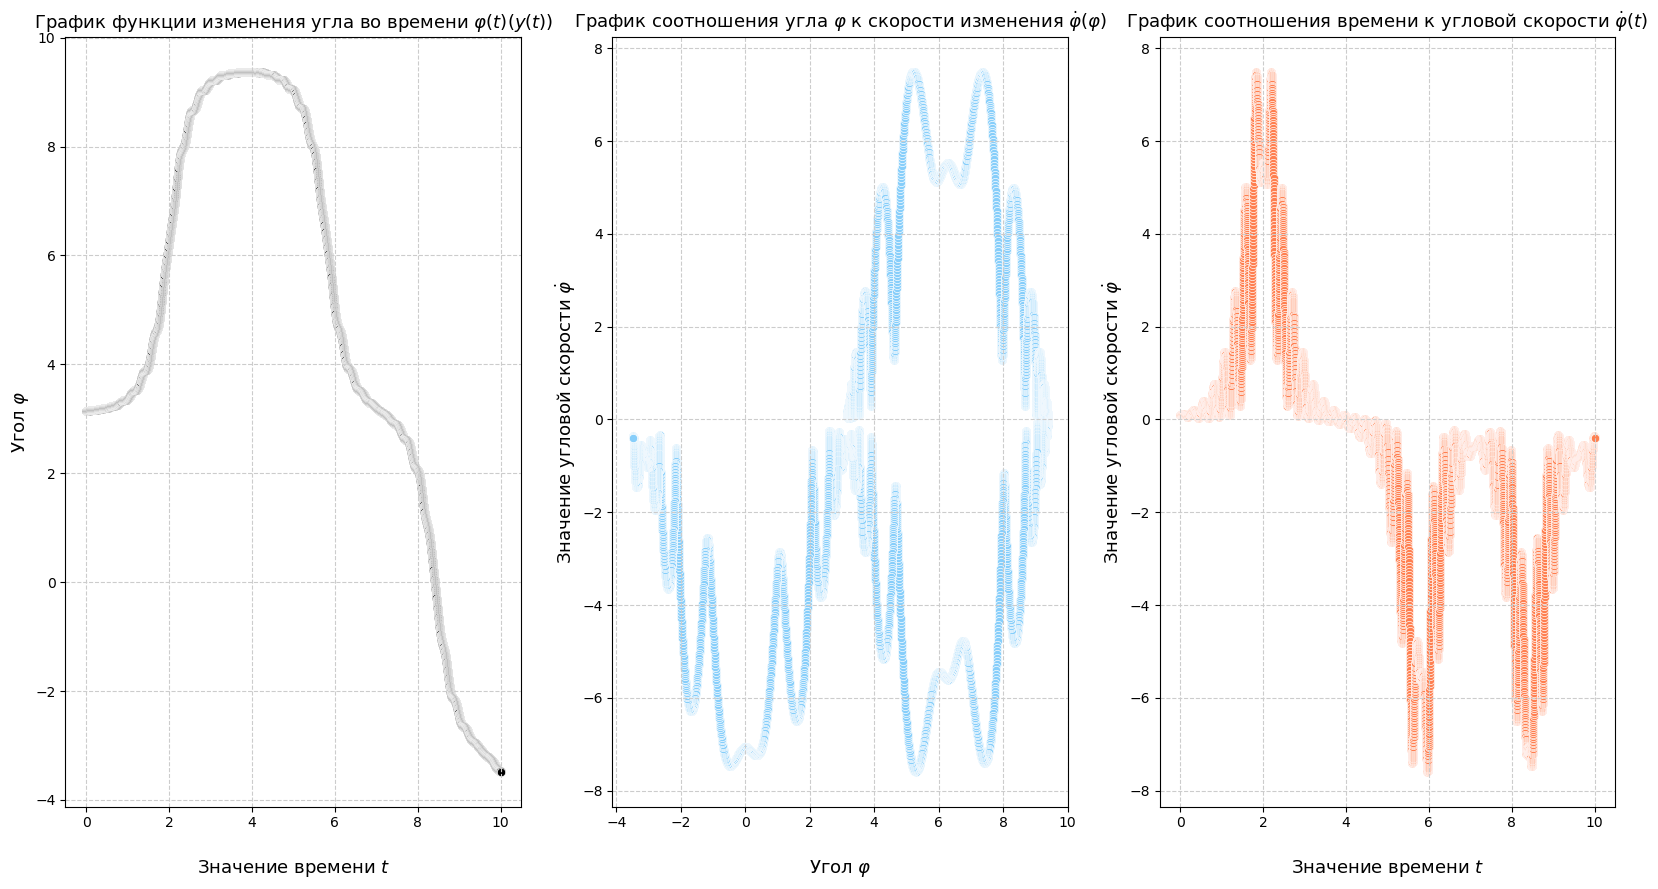

In [18]:
colors_params = {
    1: {'color': 'k'}, 
    2: {'color': 'lightskyblue'},
    3: {'color': 'coral'}
}

# Сетка фигур
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

axs[0].grid(axis='both', visible=True, linestyle="--", color='0.8')
axs[0].set_xlabel(r"Значение времени ${t}$", labelpad=20, size=13) 
axs[0].set_ylabel(r"Угол ${\varphi}$", labelpad=3, size=13)
axs[0].set_title(r"График функции изменения угла во времени ${\varphi(t)} {(y(t))}$", size=13)
with sns.axes_style("whitegrid"):
    sns.scatterplot(
        data=None,
        x=solution.t, 
        y=solution.y[0],
        sizes=(20, 200),
        marker = 'o',
        ax=axs[0],
        **colors_params[1]
    )
    
axs[1].grid(axis='both', visible=True, linestyle="--", color='0.8')
axs[1].set_xlabel(r"Угол ${\varphi}$", labelpad=20, size=13) 
axs[1].set_ylabel(r"Значение угловой скорости ${\dot {\varphi}}$", labelpad=3, size=13)
axs[1].set_title(r"График соотношения угла ${\varphi}$ к скорости изменения ${\dot \varphi(\varphi)}$", size=13)
with sns.axes_style("whitegrid"):
    sns.scatterplot(
        x=solution.y[0], 
        y=solution.y[1],
        sizes=(20, 200),
        ax=axs[1],
        **colors_params[2]
    )

axs[2].grid(axis='both', visible=True, linestyle="--", color='0.8')
axs[2].set_xlabel(r"Значение времени ${t}$", labelpad=20, size=13) 
axs[2].set_ylabel(r"Значение угловой скорости ${\dot {\varphi}}$", labelpad=3, size=13)
axs[2].set_title(r"График соотношения времени к угловой скорости ${\dot \varphi(t)}$", size=13)
with sns.axes_style("whitegrid"):
    sns.scatterplot(
        x=solution.t, 
        y=solution.y[1],
        sizes=(20, 200),
        ax=axs[2],
        **colors_params[3]
    )